# Machine Learning Coursework 

For the coursework, please make sure to implement your own code and not use libraries (except where explicitly asked). You will need to present your own code that performs nested cross-validation and the k-nearest neighbour algorithm, build confusion matrices, and estimate distances between data samples.

The purpose of this coursework is to help you:
- Get familiar with **common python modules / functions** used for ML in python
- Get practical experience **implementing** ML methods in python  
- Get practical experience regarding **parameter selection** for ML methods
- Get practical experience on **evaluating** ML methods and applying cross-validation

Notes:
- don't use libraries that implement kNN or cross-validation.  We want to see your code!
- Remember to comment all of your code (see here for tips: https://stackabuse.com/commenting-python-code/). You can also make use of Jupyter Markdown, where appropriate, to improve the layout of your code and documentation.
- Please add docstrings to all of your functions (so that users can get information on inputs/outputs and what each function does by typing SHIFT+TAB over the function name. For more detail on python docstrings, see here: https://numpydoc.readthedocs.io/en/latest/format.html)
- When a question allows a free-form answer (e.g. what do you observe?), create a new markdown cell below and answer the question in the notebook. 
- Always save your notebook when you are done (this is not automatic)!
- Upload your completed notebook using the VLE

Plagiarism: please make sure that the material you submit has been created by you. Any sources you use for code should be properly referenced. Your code will be checked for plagiarism using appropriate software.

### Marking 

The grades in this coursework are allocated approximately as follows:

|                                                    | mark  |  
|----------------------------------------------------|-------|
| Data exploration (+ 2 questions)                   | 9     |  
| Code, docu. & comments (KNN + Evaluation + NCV)    | 12    |  
| Results (KNN folds + Summary + Confusion matrices) | 9     |  
| Final questions:                                   | 9     |  
| Overall quality & use of Markdown                  | 6     |  
| Total available                                    |**45** |  


## 1. Exploratory Data Analysis [9 pts]

In this coursework we are going to be working with the **Wine** dataset. This is a 178 sample dataset that categorises 3 different types of Italian wine using 13 different features. The code below loads the Wine dataset and selects a subset of features for you to work with. 

In [1]:
# set matplotlib backend to inline
%matplotlib inline 

# import modules
import seaborn as sns
from sklearn import datasets 
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd

# load data
wine=datasets.load_wine()
#print(wine.DESCR)

# this dataset has 13 features, we will only choose a subset of these
df_wine = pd.DataFrame(wine.data, columns = wine.feature_names )
selected_features = ['alcohol','flavanoids','color_intensity','ash']

# extract the data as numpy arrays of features, X, and target, y
X = df_wine[selected_features].values
y = wine.target

### 1.1. Visualising the data

The first part of tackling any ML problem is visualising the data in order to understand some of the properties of the problem at hand.  When there are only a small number of classes and features, it is possible to use scatter plots to visualise interactions between different pairings of features. 

The following image shows what such a visualisation might look like on the Iris dataset that you worked on during the Topic exercises. 

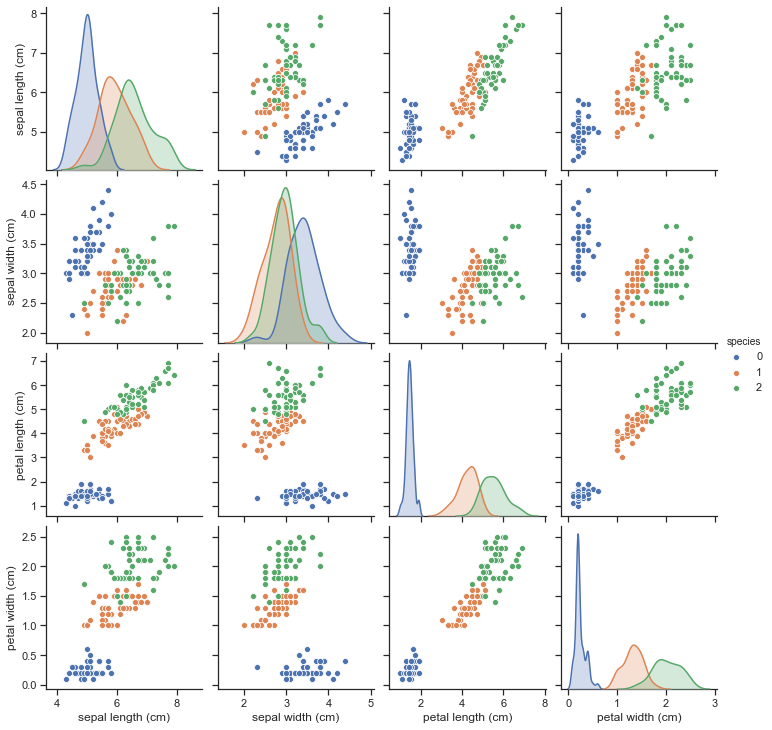

Your first task is to recreate a similar grid for the **Wine** dataset, with each off-diagonal subplot showing the interaction between two features, and each of the classes represented as a different colour. The on-diagonal subplots (representing a single feature) should show a distribution (or histogram) for that feature.     

You should create a function that, given data X and labels y, plots this grid.  The function should be invoked something like this:
        
    myplotGrid(X,y,...)
    
where X is your training data and y are the labels (you may also supply additional optional arguments). You can use an appropriate library to help you create the visualisation. You might want to code it yourself using matplotlib functions scatter and hist - however, this is not strictly necessary here, so try not spend too much time on this. 


In [2]:
# define plotting function
def myplotGrid(X,y,features):
    """" this function creates a pd dataframe from the excrated numpy arrays 'X' and the selected features. 
    Then the y numpy array is addad as a new column with the name 'target'.
    At last the dataframe is plotted by using the seaborn pairplot function"""
    
    data=pd.DataFrame(data=X,columns=features)
    data['target'] = y
    sns.pairplot(data, hue='target',palette="tab10")

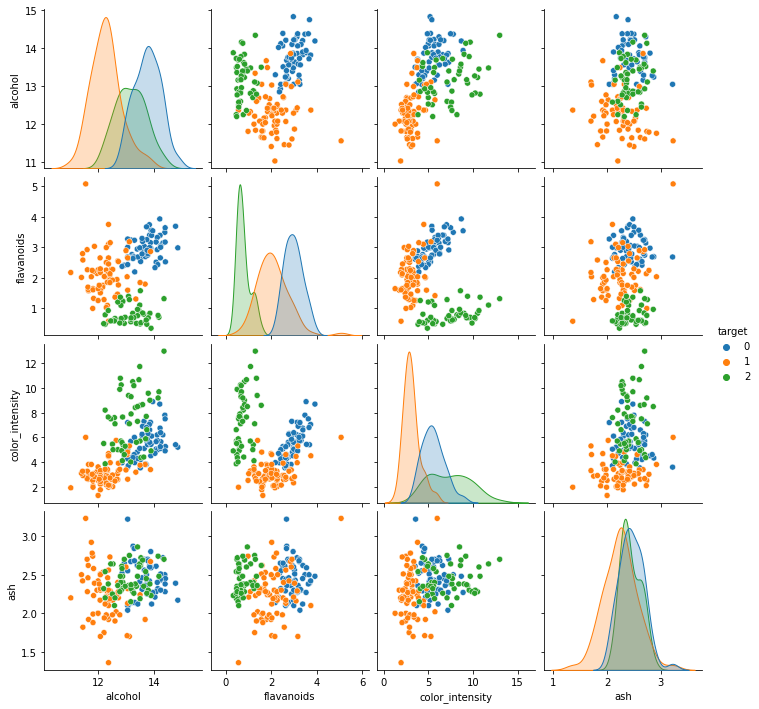

In [3]:
# run the plotting function
myplotGrid(X,y,selected_features)

### 1.2. Exploratory Data Analysis under noise

When data are collected under real-world settings they usually contain some amount of noise that makes classification more challenging. In the cell below, invoke your exploratory data analysis function above on a noisy version of your data X.

Try to perturb your data with some Gaussian noise,

    # initialize random seed to replicate results over different runs
    mySeed = 12345 
    np.random.seed(mySeed) 
    XN=X+np.random.normal(0,0.5,X.shape)
    
and then invoke

    myplotGrid(XN,y)

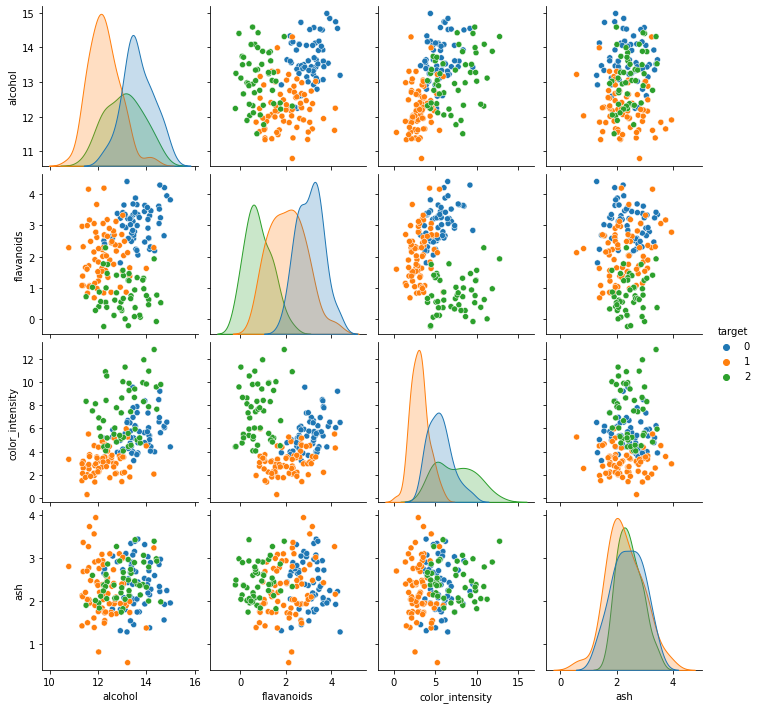

In [4]:
# noise code 
# initialize random seed to replicate results over different runs
mySeed = 12345 
np.random.seed(mySeed) 
XN=X+np.random.normal(0,0.5,X.shape)

myplotGrid(XN,y,selected_features)


### Q1. Exploratory data analysis
Based on your exploratory analysis, if you were to build a classifier using only two of the available features, which ones would you choose and why?  Answer as fully as you can. 


answer: I want to make it as easy as possible for the classifier. I would chose 'color_intensity' and 'flavanoids' because as seen in the plot above(the one with the clean data) there are some pretty obvious clusters which are really far apart from other clusters.


### Q2. Data with noise
What do you observe by plotting the data without noise compared to plotting with added Gaussian noise? 


answer: I observe that the data points are way more overlapping with noise. Also there are no obvious clusters in the plotted data with noise anymore. Theoretically it should be harder for the classifier to predict everything right as data points are now more overlapping.



## 2. Implementing kNN [6 pts]

In the cell below, develop your own code for performing k-Nearest Neighbour classification.  You may use the scikit-learn k-NN implementation from the labs as a guide - and as a way of verifying your results - but it is important that your implementation does not use any libraries other than the basic numpy and matplotlib functions. 

Define a function that performs k-NN given a set of data.  Your function should be invoked similary to:

        y_ = mykNN(X,y,X_,options)
        
where X is your training data, y is your training outputs, X\_ are your testing data and y\_ are your predicted outputs for X\_.  The options argument (can be a list or a set of separate arguments depending on how you choose to implement the function) should at least contain the number of neighbours to consider as well as the distance function employed.

Hint: it helps to break the problem into various sub-problems, implemented as helper function. For example, you might want to implement separate function(s) for calculating the distances between two vectors. And another function that uncovers the nearest neighbour(s) to a given vector. 


In [5]:
# helper code
# Euclidean Distance function
def eucledian(p1,p2):
    dist = np.sqrt(np.sum((p1-p2)**2))
    return dist

# manhattan distance function
def manhattan(p1, p2):
    dist = sum(abs(val1-val2) for val1, val2 in zip(p1,p2))
    return dist
 

"""Train test and split"""
def shuffle_split_data(X, y, percentage):
    '''Takes: X, y, percentage=test size: a number between 0 and 100'''
    # test test size value
    if (percentage < 0.0 or percentage > 100):
        print("please use a test size bettween 0 and 100")
        return
    # Shuffle X and y
    l = np.arange(X.shape[0])
    np.random.shuffle(l)
    X = X[l]
    y = y[l]
    # Split X and y using the test_size number  
    cutoff=round(len(X)*percentage/100)
    X_test = X[0:cutoff]
    y_test = y[0:cutoff]
    X_train = X[cutoff:]
    y_train = y[cutoff:]
    return (X_train, X_test, y_train, y_test)

In [6]:
def costum_knn(X_train, y_train, X_test, k, distance_type):
    ''' Takes: X_train=training_inputs, y_train=target_training_intputs, X_test=test_inputs, 
        k=num_of_neighbours, distance_type=("euclidian" | "manhattan")
    '''
    predicted=[]  
    # Fit and predict
    for x in X_test:
        neighbours=[[],[]]
        # Get distances between all data points either euclidian or manhttan
        if distance_type=="euclidian":
            distances = [eucledian(x, j) for j in X_train]
        elif distance_type=="manhattan":
            distances = [manhattan(x, j) for j in X_train]         
        # Get indices of the k smallest within neighbours
        k_nearest_ids = np.argsort(distances)[:k]
        # Get labels for those indices
        k_nearest_labels = [y_train[m] for m in k_nearest_ids]
        # Count the labels 
        counts = np.bincount(k_nearest_labels)
        # Predicted class is most common class
        predicted.append(np.argmax(counts))
    return np.array(predicted)

In [7]:
# Test/Train Split
X_train, X_test, y_train, y_test = shuffle_split_data(XN, y, 70)

# predict
y_pred=costum_knn(X_train,y_train,X_test,3,"euclidian")

## 3. Classifier evaluation [3 pts]

In the cell below, implement your own classifier evaluation code. This should include some way of calculating confusion matrices, as well as common metrics like accuracy. 

Write some additional code that lets you display the output of your confusion matrices in a useful and easy-to-read manner.

You might want to test your functions on some test data, and compare the results to the sklearn library versions. 


In [8]:
def conf_mat(y_test,y_pred):
    C = [[0, 0, 0], # initialize the confusion matrix to zeros
         [0, 0, 0],
         [0, 0, 0]] 
    
    for i in range(0, len(y_pred)):
        C[y_test[i]][y_pred[i]] +=1
    #loop through all results and update the confusion matrix
    return np.array(C)

In [9]:
def costum_accuracy(y_test,y_pred):
    accuracy = len(y_test[np.where(y_test==y_pred)])/len(y_pred) #np.where()
    return accuracy

def costum_precision(conf_matrix):
    '''Takes confusion matrix returns precision'''
    classes = np.unique(y)
    precision = np.zeros(classes.shape)
    for i in range(0,len(conf_matrix)):
        tp_plus_fp=0
        for j in classes:
            # true positives + false positives
            tp_plus_fp+=conf_matrix[j][i]
        # precision = true positives / true positives + false positives
        class_precision=conf_matrix[i][i]/tp_plus_fp
        precision[i]=class_precision
    return precision

def costum_recall(conf_matrix):
    '''Takes confusion matrix returns recall'''
    classes = np.unique(y)
    recall = np.zeros(classes.shape)
    for i in range(0,len(conf_matrix)):
        tp_plus_fn=0
        for j in classes:
            # true positives + false negatives
            tp_plus_fn+=conf_matrix[i][j]
        # recall = true positives / true positives + false negatives
        class_recall=conf_matrix[i][i]/tp_plus_fn
        recall[i]=class_recall
    return recall

In [10]:
def plot_cm_metrics(y_test,y_pred):
        
    # plotting and printing confusion matrix and metrics
    #ax = sns.heatmap(conf_matrix, annot=True, cmap='Blues')
    ax = sns.heatmap(conf_mat(y_test,y_pred), annot=True, cmap='Blues')

    ax.set_title('Confusion Matrix with labels\n\n');
    ax.set_xlabel('\nPredicted Values')
    ax.set_ylabel('Actual Values ');

    ## Display the visualization of the Confusion Matrix.
    plt.show()
    print('classes:      %s' % np.unique(y_pred) ) 
    print('accuary: %s' % costum_accuracy(y_test,y_pred))
    print('precision: %s' % costum_precision(conf_mat(y_test,y_pred)))
    print('recall:    %s' % costum_recall(conf_mat(y_test,y_pred)))

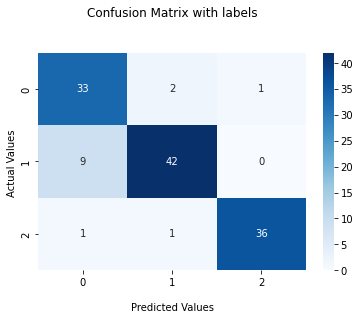

classes:      [0 1 2]
accuary: 0.888
precision: [0.76744186 0.93333333 0.97297297]
recall:    [0.91666667 0.82352941 0.94736842]


In [11]:
# test evaluation code
plot_cm_metrics(y_test,y_pred)


## 4. Nested Cross-validation using your implementation of KNN  [6 pts]

In the cell below, develop your own code for performing 5-fold nested cross-validation along with your implemenation of k-NN above. You must write your own code -- the scikit-learn module may only be used for verification purposes. 

Your code for nested cross-validation should invoke your kNN function (see above). You cross validation function should be invoked similary to:

    accuracies_fold = myNestedCrossVal(X,y,5,list(range(1,11)),['euclidean','manhattan'],mySeed)
    
where X is your data matrix (containing all samples and features for each sample), 5 is the number of folds, y are your known output labels, ``list(range(1,11)`` evaluates the neighbour parameter from 1 to 10, and ``['euclidean','manhattan',...]`` evaluates the distances on the validation sets.  mySeed is simply a random seed to enable us to replicate your results.

**Notes:** 
- you should perform nested cross-validation on both your original data X, as well as the data pertrubed by noise as shown in the cells above (XN)
- you should evaluate **at least** two distance functions
- you should evaluate number of neighbours from 1 to 10
- your function should return a list of accuracies per fold
- for each **fold**, your function should print:
  - the accuracy per distinct set of parameters on the validation set
  - the best set of parameters for the fold after validation
  - the confusion matrix per fold (on the testing set)


In [12]:
# parameters for testing code
nFolds = 5
seed = np.random.seed(mySeed)
nns=list(range(1,11))
dists=["euclidian", "manhattan"]

In [13]:
# myNestedCrossVal code
def costum_CrossVal(X,y,nFolds,nns,dist,seed):
    accuracy_fold=[]
    parameters_fold=[]
    conf_matrices=[]
    L=list(range(X.shape[0]))
    indices = np.random.permutation(L)

    bins=np.array_split(indices, nFolds)

    #loop through folds
    for i in range(0,nFolds):
        foldTrain=[] # list to save current indices for training
        foldTest=[]  # list to save current indices for testing
        foldVal=[]    # list to save current indices for validation
        #loop through all bins, take bin i for testing, the next bin for validation, and the rest for training
        valBin = (i+1)%nFolds
        for j in range(0,len(bins)):
            if (i == j):
                foldTest = bins[i]
            elif (j == valBin):
                foldVal = bins[valBin]
            else:
                foldTrain.extend(bins[j])

        bestDistance='' #save the best distance metric here
        bestNN=-1 #save the best number of neighbours here
        bestAccuracy=-10 #save the best attained accuracy here (in terms of validation)
        # loop through all parameters (one for loop for distances, one for loop for nn)
        # train the classifier on current number of neighbours/distance
        # obtain results on validation set
        # save parameters if results are the best we had
        for d in dists:
            for nn in nns:
                #split to train and test
                y_pred=costum_knn(X[foldTrain],y[foldTrain],X[foldVal],nn,d)
                accuracy = costum_accuracy(y[foldVal], y_pred)
                if accuracy > bestAccuracy:
                    bestDistance = d
                    bestNN = nn
                    bestAccuracy = accuracy
        #evaluate on test data:
        #extend your training set by including the validation set
        #train k-NN classifier on new training set and test on test set
        #get performance on fold, save result in accuracy_fold
        foldTrain.extend(foldVal)
        y_pred=costum_knn(X[foldTrain],y[foldTrain], X[foldTest], bestNN,bestDistance)
        accuracy_=costum_accuracy(y[foldTest],y_pred)
        accuracy_fold.append(accuracy)
        parameters_fold.append((bestDistance, bestNN))
        conf_matrix=conf_mat(y[foldTest],y_pred)
        conf_matrices.append(conf_matrix)
        print('==== Final Cross-val on test on this fold with NN = ', bestNN, 'dist = ', bestDistance, ' accuracy = ',costum_accuracy(y[foldTest],y_pred))

    return accuracy_fold, parameters_fold, np.array(conf_matrices);

In [14]:
# evaluate clean data code
accuracies_fold, best_parameters_fold, clean_conf_matrices = costum_CrossVal(X,y,nFolds,nns,dists,seed)
avg_accuracy = np.average(accuracies_fold)
sd = np.std(accuracies_fold)
columns=(["accuracy", "k", "distance"])
rounded_accuracies=["{0:.2f}".format(i) for i in accuracies_fold]
dist_metrics=[best_parameters_fold[i][0] for i in range(0,len(best_parameters_fold))]
nns=[best_parameters_fold[i][1] for i in range(0,len(best_parameters_fold))]
data = np.array([rounded_accuracies,nns,dist_metrics])
df=pd.DataFrame(data.T,np.arange(1,6), columns,)
print("\nClean")
print("\nTotal accuracy: %8.3f ± %8.3f" % (avg_accuracy,  sd))
display(df)

==== Final Cross-val on test on this fold with NN =  3 dist =  euclidian  accuracy =  0.9722222222222222
==== Final Cross-val on test on this fold with NN =  1 dist =  euclidian  accuracy =  0.9166666666666666
==== Final Cross-val on test on this fold with NN =  1 dist =  euclidian  accuracy =  0.9444444444444444
==== Final Cross-val on test on this fold with NN =  5 dist =  euclidian  accuracy =  0.8857142857142857
==== Final Cross-val on test on this fold with NN =  1 dist =  euclidian  accuracy =  0.9428571428571428

Clean

Total accuracy:    0.927 ±    0.038


,accuracy,k,distance
1,0.92,3,euclidian
2,0.89,1,euclidian
3,0.89,1,euclidian
4,0.97,5,euclidian
5,0.97,1,euclidian


In [15]:
# evaluate noisy  data code

# Do nested cross validated k nearest neighbour on noisey data
noisey_accuracies_fold, noisey_best_parameters_fold, noisey_conf_matrices = costum_CrossVal(XN,y,nFolds,nns,dists,seed)
noisey_avg_accuracy = np.average(noisey_accuracies_fold)
sd = np.std(noisey_accuracies_fold)
columns=(["accuracy", "k", "distance"])
noisey_rounded_accuracies=["{0:.2f}".format(i) for i in noisey_accuracies_fold]
noisey_dist_metrics=[noisey_best_parameters_fold[i][0] for i in range(0,len(noisey_best_parameters_fold))]
noisey_nns=[noisey_best_parameters_fold[i][1] for i in range(0,len(noisey_best_parameters_fold))]
noisey_data = np.array([noisey_rounded_accuracies,noisey_nns,noisey_dist_metrics])
noisey_df=pd.DataFrame(noisey_data.T,np.arange(1,6), columns,)
print("\nNoisey")
print("\nTotal accuracy: %8.3f ± %8.3f" % (noisey_avg_accuracy,  sd))
display(noisey_df)

==== Final Cross-val on test on this fold with NN =  1 dist =  euclidian  accuracy =  0.8333333333333334
==== Final Cross-val on test on this fold with NN =  5 dist =  euclidian  accuracy =  0.9166666666666666
==== Final Cross-val on test on this fold with NN =  3 dist =  manhattan  accuracy =  0.9722222222222222
==== Final Cross-val on test on this fold with NN =  3 dist =  manhattan  accuracy =  0.9714285714285714
==== Final Cross-val on test on this fold with NN =  3 dist =  euclidian  accuracy =  0.8571428571428571

Noisey

Total accuracy:    0.899 ±    0.028


,accuracy,k,distance
1,0.94,1,euclidian
2,0.89,5,euclidian
3,0.91,3,manhattan
4,0.89,3,manhattan
5,0.86,3,euclidian


## 5. Summary of results [6 pts]

Using your results from above, fill out the following table using the **clean** data:

| Fold | accuracy |  k  | distance |
| --- | --- | --- | --- |
| 1 | 0.92  |  3 | euclidian  |
| 2 | 0.89  |  1 | euclidian  |
| 3 | 0.89  |  1 | euclidian  |
| 4 | 0.97  |  5 | euclidian  |
| 5 | 0.97	  |  1 | euclidian  |
| **total** | 0.927  $\pm$ 0.038 |   |    |

Where **total** is given as an average over all the folds, and $\pm$ the standard deviation.

Now fill out the following table using the **noisy** data:

| Fold | accuracy |  k  | distance |
| --- | --- | --- | --- |
| 1 | 0.94  |  1 | euclidian  |
| 2 | 0.89  |  5 | euclidian  |
| 3 | 0.91  |  3 | manhattan  |
| 4 | 0.89  |  3 | manhattan  |
| 5 | 0.86  |  3 | euclidian  |
| **total** | 0.899  $\pm$ 0.028 |   |    |


### 5.2. Confusion matrix summary

Summarise the overall results of your nested cross validation evaluation of your K-NN algorithm using two summary confusion matrices (one for the noisy data, one for the clean data). You might want to adapt your ```myNestedCrossVal``` code above to also return a list of confusion matrices.

Use or adapt your evaluation code above to print the two confusion matrices below. Make sure you label the matrix rows and columns. You might also want ot show class-relative precision and recall. 


In [16]:
# function for summing up the confusion matrices
def summary_matrices(conf_matrices):
    conf=np.zeros(conf_matrices[0].shape)
    for i in conf_matrices:
        conf=np.add(conf,i) 
    precision = costum_precision(conf)
    recall = costum_recall(conf)
    return conf,precision,recall

In [17]:
# function for plotting summary confusion matrix
def plot_summary_cm_metrics(conf_matrices):
    conf,precision,recall = summary_matrices(conf_matrices)
    ax = sns.heatmap(conf, annot=True, cmap='Blues')
    ax.set_title('Confusion Matrix with labels\n\n');
    ax.set_xlabel('\nPredicted Values')
    ax.set_ylabel('Actual Values ');

    ## Display the visualization of the Confusion Matrix and print metrics
    plt.show()
    print('classes:      %s' % np.unique(y_pred) ) 
    print("Accuracy: %8.2f"%avg_accuracy)
    print("Class-relative precision for classes [0,1,2]: %s" %precision)
    print("Class-relative recall for classes [0,1,2]: %s" %recall)

Clean data



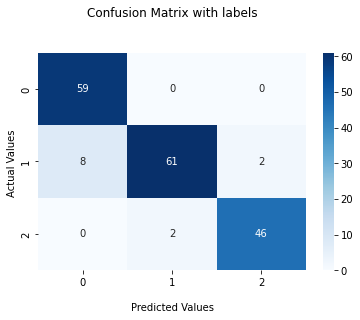

classes:      [0 1 2]
Accuracy:     0.93
Class-relative precision for classes [0,1,2]: [0.88059701 0.96825397 0.95833333]
Class-relative recall for classes [0,1,2]: [1.         0.85915493 0.95833333]


Noisey data



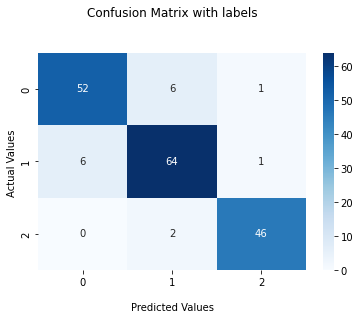

classes:      [0 1 2]
Accuracy:     0.93
Class-relative precision for classes [0,1,2]: [0.89655172 0.88888889 0.95833333]
Class-relative recall for classes [0,1,2]: [0.88135593 0.90140845 0.95833333]


In [18]:
# clean data summary results
print("Clean data\n")
plot_summary_cm_metrics(clean_conf_matrices)

# noisey data summary results
print("\n\nNoisey data\n")
plot_summary_cm_metrics(noisey_conf_matrices)

## 6. More questions [9 pts]

Now answer the following questions as fully as you can. The answers should be based on your implementation above. Write your answers in the Markdown cells below each question.



### Q3.	 Influence of noise
Do the best parameters change when noise is added to the data? Can you say that one parameter choice is better regardless of the data used? 


Answer: Yes the best parameters change when noise is added. For the clean data, the best parameters are 5 k and 1k and euclidian. For the noisy data it was 4 k and euclidian. 

Yes I think I can confidently say that euclidian is always the best choice regardless of the data.

### Q4. Tie break
Assume that you have selected the number of neighbours to be an even number, e.g., 2. For one of the neighbours, the suggested class is 1, and for the other neighbour the suggested class is 2. How would you break the tie? Write example pseudocode that does this.

Answer:



### Q5.	Beyond Wine 
If you were to run your k-nn algorithm on a new dataset (e.g., the breast cancer dataset, or Iris), what considerations would you need to take into consideration? Outline any changes that might be needed to your code. 


Answer: I might need to look at feature selection and see which features are good for usage and which are not. Also it is important to look at multicollinearity. Multicollinearity exists whenever an independent variable is highly correlated with one or more of the other independent variables in a multiple regression equation. Multicollinearity is a problem because it undermines the statistical significance of an independent variable. And of course dimensionality reduction. Dimensionality reductionrefers to techniques that reduce the number of input variables in a dataset. More input features often make a predictive modeling task more challenging to model, more generally referred to as the curse of dimensionality. So those are the changes I would consider.
